In [64]:
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib

In [144]:
minerr = 3e-08
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [3]:
test_in = sp.load('../dopc-293/r1/py_output.npz')
test_in.f.arr_0

array(['names', 'viscosity at each timestep (from 0)',
       'viscosity uncertainties',
       'rolling weighted average viscosity from 0',
       'SEM for rolling average viscosity'], dtype='<U41')

In [4]:
data = pd.DataFrame()

lipids = sp.array(['dopc-293','dopc-303','dopc-313','dopc-323','dmpc','dppc','sopc','popc'])

for l, lip in enumerate(lipids):
    for r in range(5):
#         print(lip,r+1)
        filename = '../'+lip+'/r'+str(r+1)+'/py_output.npz'
        temp = sp.load(filename)
        data[lip+'-r'+str(r+1)+'-visc'] = sp.array(temp.f.arr_1)
        data[lip+'-r'+str(r+1)+'-visc-unc'] = sp.absolute(sp.array(temp.f.arr_2))
        data[lip+'-r'+str(r+1)+'-visc-unc'][0] = data[lip+'-r'+str(r+1)+'-visc-unc'][1]
        data[lip+'-r'+str(r+1)+'-roll'] = sp.array(temp.f.arr_3)
        data[lip+'-r'+str(r+1)+'-roll-unc'] = sp.array(temp.f.arr_4)
        data[lip+'-r'+str(r+1)+'-roll-unc'][0:2] = data[lip+'-r'+str(r+1)+'-roll-unc'][2]
data

,dopc-293-r1-visc,dopc-293-r1-visc-unc,dopc-293-r1-roll,dopc-293-r1-roll-unc,dopc-293-r2-visc,dopc-293-r2-visc-unc,dopc-293-r2-roll,dopc-293-r2-roll-unc,dopc-293-r3-visc,dopc-293-r3-visc-unc,...,popc-r3-roll,popc-r3-roll-unc,popc-r4-visc,popc-r4-visc-unc,popc-r4-roll,popc-r4-roll-unc,popc-r5-visc,popc-r5-visc-unc,popc-r5-roll,popc-r5-roll-unc
0,2.156990e-10,1.030921e-12,2.156990e-10,1.012271e-12,2.175247e-10,1.037443e-12,2.175247e-10,4.490141e-13,2.176603e-10,1.038837e-12,...,2.183537e-10,1.311412e-12,2.158922e-10,1.032398e-12,2.158922e-10,7.454807e-13,2.163582e-10,1.027978e-12,2.163582e-10,7.195598e-13
1,2.177236e-10,1.030921e-12,2.156990e-10,1.012271e-12,2.184227e-10,1.037443e-12,2.175247e-10,4.490141e-13,2.192258e-10,1.038837e-12,...,2.183537e-10,1.311412e-12,2.173832e-10,1.032398e-12,2.158922e-10,7.454807e-13,2.177973e-10,1.027978e-12,2.163582e-10,7.195598e-13
2,2.183649e-10,1.262635e-12,2.167113e-10,1.012271e-12,2.187747e-10,1.269830e-12,2.179737e-10,4.490141e-13,2.201125e-10,1.271423e-12,...,2.196651e-10,1.311412e-12,2.194934e-10,1.259901e-12,2.166377e-10,7.454807e-13,2.179341e-10,1.260884e-12,2.170778e-10,7.195598e-13
3,2.190314e-10,1.458534e-12,2.171247e-10,1.131924e-12,2.198656e-10,1.466317e-12,2.181742e-10,5.210913e-13,2.213498e-10,1.469145e-12,...,2.204724e-10,1.803358e-12,2.216421e-10,1.453728e-12,2.173554e-10,1.396626e-12,2.210450e-10,1.457843e-12,2.172914e-10,7.251792e-13
4,2.198002e-10,1.630519e-12,2.174255e-10,1.249886e-12,2.217949e-10,1.639973e-12,2.184414e-10,7.805576e-13,2.218211e-10,1.643173e-12,...,2.208505e-10,1.871796e-12,2.219778e-10,1.625927e-12,2.180362e-10,2.023740e-12,2.240797e-10,1.628576e-12,2.178816e-10,1.519991e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87995,-9.184714e-10,6.788746e-10,2.441698e-10,5.655884e-11,1.057199e-09,7.160062e-10,2.719206e-10,9.622153e-11,-1.955271e-09,6.667768e-10,...,3.376129e-10,2.668300e-10,2.300696e-09,6.686384e-10,2.767135e-10,9.167239e-11,1.159838e-09,7.294924e-10,3.328660e-10,1.740117e-10
87996,-7.460511e-10,6.844214e-10,2.441697e-10,5.656010e-11,9.623807e-10,7.223230e-10,2.719207e-10,9.622183e-11,-1.969790e-09,6.707704e-10,...,3.376130e-10,2.668301e-10,2.287191e-09,6.694175e-10,2.767137e-10,9.167481e-11,1.071170e-09,7.304639e-10,3.328660e-10,1.740118e-10
87997,-1.065529e-09,6.916021e-10,2.441696e-10,5.656100e-11,9.909372e-10,7.245936e-10,2.719207e-10,9.622206e-11,-2.048641e-09,6.748191e-10,...,3.376130e-10,2.668301e-10,2.218447e-09,6.750694e-10,2.767139e-10,9.167720e-11,1.009789e-09,7.381570e-10,3.328661e-10,1.740120e-10
87998,-1.059622e-09,7.479857e-10,2.441694e-10,5.656253e-11,8.430121e-10,7.371201e-10,2.719208e-10,9.622231e-11,-1.975348e-09,6.763545e-10,...,3.376131e-10,2.668302e-10,2.189925e-09,6.778849e-10,2.767141e-10,9.167939e-11,1.087353e-09,7.463956e-10,3.328662e-10,1.740121e-10


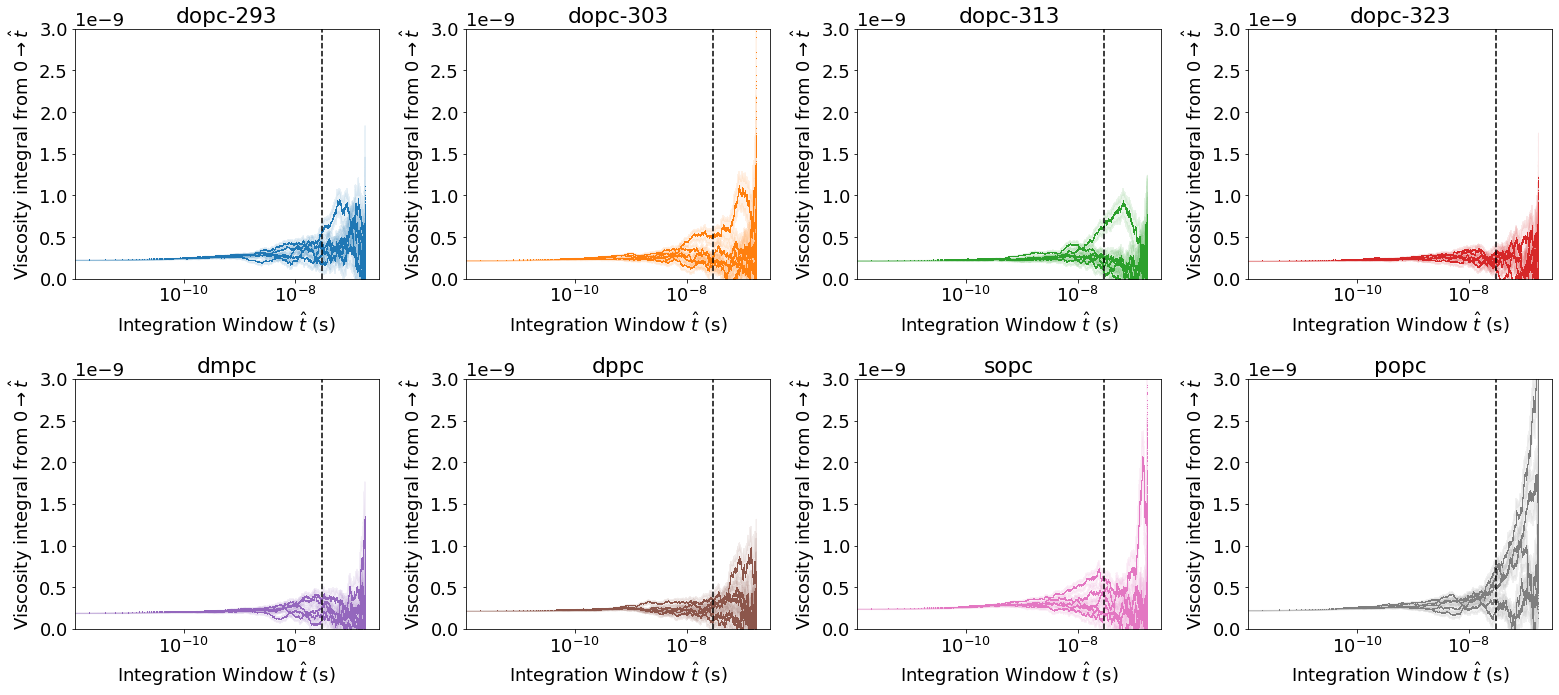

In [89]:
x = sp.arange(len(data['dppc-r1-roll']))*2e-12
plt.figure(figsize = (22,10))
for l, lipid in enumerate(lipids):
    scolor = 'C'+str(l)
    plt.subplot(2,4,l+1)
    for r in range(5):
        vals = data[lipid+'-r'+str(r+1)+'-visc']
        uncs = data[lipid+'-r'+str(r+1)+'-visc-unc']
        plt.plot(x, vals, ',', c=scolor)
        plt.fill_between(x, y1=vals+uncs, y2=vals-uncs, alpha=0.1, color=scolor)
    plt.title(lipid)
#     plt.ylim(1.7e-10,4.3e-10)
    plt.ylim(0,3e-9)
    plt.xscale('log')
    plt.axvline(minerr, ls='--', c='black')
    plt.xlabel("Integration Window $t^\star$ (s)")
    plt.ylabel("Viscosity integral from $t^\star$")
plt.tight_layout()
plt.show()

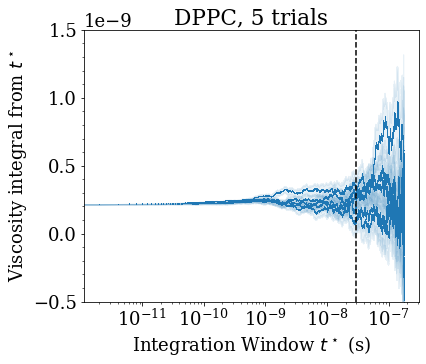

In [146]:
plt.figure(figsize = (6,5))
l = 5 
lipid = 'dppc'
scolor = 'C'+str(l)
for r in range(5):
    vals = data[lipid+'-r'+str(r+1)+'-visc']
    uncs = data[lipid+'-r'+str(r+1)+'-visc-unc']
    plt.plot(x, vals, ',',c='C0')
    plt.fill_between(x, y1=vals+uncs, y2=vals-uncs, alpha=0.1, color='C0')
plt.title('DPPC, 5 trials')
plt.ylim(-0.5e-9,1.5e-9)
plt.xscale('log', subsx=[2, 3, 4, 5, 6, 7, 8, 9])
plt.axvline(minerr, ls='--', c='black')
plt.xlabel("Integration Window $t^\star$ (s)")
plt.minorticks_on()
plt.ylabel("Viscosity integral from $t^\star$")

# plt.tight_layout()
plt.show()

In [6]:
sp.array(data[lipid+'-r'+str(r+1)+'-visc'])

array([2.16358225e-10, 2.17797344e-10, 2.17934054e-10, ...,
       1.00978897e-09, 1.08735347e-09, 1.02645491e-09])

# roll-unc
I've realized I calculated the rolling uncertainties slightly incorrectly.\
I can fix that using the other columns that I have though, so that's cool.\
$$s_{wtd} = \sqrt{\left(    \frac{\sum_{i=1}^n w_ix_i^2}{\sum_{i=1}^n w_i} - \left(    \bar x_{wtd}    \right)^2   \right)\frac{1}{n-1}}$$

In [7]:
print('This is no longer needed')
# import time
# lipids1 = ['dopc-293','dopc-303','dopc-313','dopc-323','dmpc','dppc','sopc','popc']
# for lipid in lipids1:
#     for r in range(5):
#         visc = sp.array(data[lipid+'-r'+str(r+1)+'-visc'])
#         print('v')
#         weights = sp.array(data[lipid+'-r'+str(r+1)+'-visc-unc']**(-2))
#         print('w')
#         start = time.time()
#         data[lipid+'-r'+str(r+1)+'-roll-unc'][2:] = sp.array([
#             (
#                 (
#                     sp.add(sp.average(visc[:n]**2, weights=weights[:n]),
#                     - sp.average(visc[:n], weights = weights[:n])**2)
#                 )
# #                 / (n-1)
#             )**(1/2)
#             for n in range(2, len(visc))
#         ])
#         end = time.time()
#         print(end - start)
#         print(lipid,r)

This is no longer needed


In [8]:
for lipid in lipids:
    for r in range(5):
        data[lipid+'-r'+str(r+1)+'-roll-unc'][0:2] = data[lipid+'-r'+str(r+1)+'-roll-unc'][2]

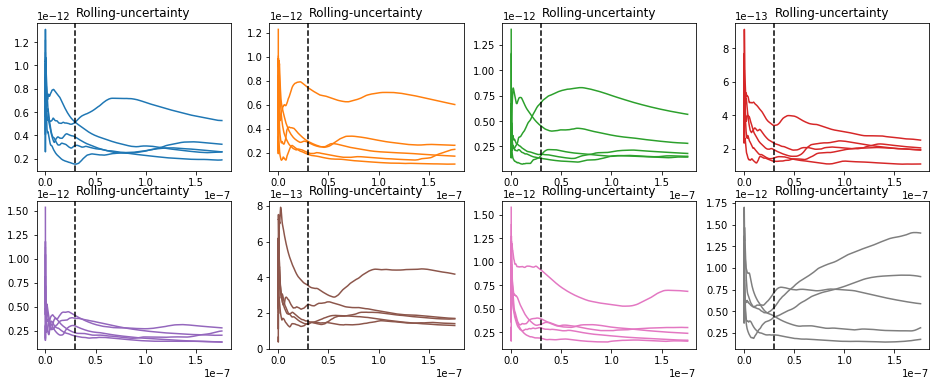

In [9]:
plt.figure(figsize = (16,6))
y1 = data[lipid+'-r'+str(r+1)+'-roll-unc']
y2 = sp.arange(1,len(y1)+1)
for l, lipid in enumerate(lipids):
    scolor = 'C'+str(l)
    plt.subplot(2,4,l+1)
    for r in range(5):
        y1 = data[lipid+'-r'+str(r+1)+'-roll-unc']
        plt.plot(x, y1/y2**(1/2), c=scolor)
    plt.title('Rolling-uncertainty')
#     plt.ylim(5e-14, 2.1e-11)
#     plt.xscale('log')
#     plt.yscale('log')
    plt.axvline(minerr, ls='--', c='black')
plt.show()

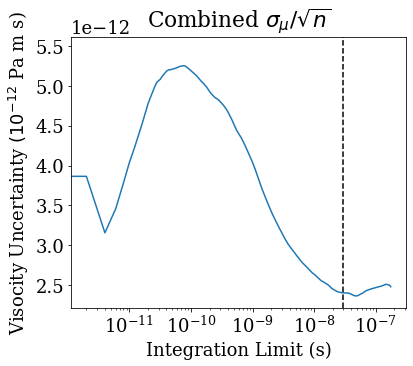

minimum is at $\tau=$ 4.7372e-08


In [157]:
y1 = data[lipid+'-r1-roll-unc']
y2 = sp.arange(1,len(y1)+1)



adding = sp.zeros_like(y1)


for l, lipid in enumerate(lipids):
    scolor = 'C'+str(l)
    for r in range(5):
        adding += data[lipid+'-r'+str(r+1)+'-roll-unc']**2
        
plt.figure(figsize = (6,5))

plt.title('Combined $\sigma_{\mu}/\sqrt{n}$')
plt.plot(x, (adding/y2)**(0.5))
#     plt.ylim(5e-14, 2.1e-11)
plt.ylabel('Visocity Uncertainty $(10^{-12}$ Pa m s)')
plt.xlabel('Integration Limit (s)')
plt.xscale('log')
plt.axvline(minerr, ls='--', c='black')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()
print('minimum is at $\\tau=$', x[((adding/y2)**(0.5)).idxmin()])

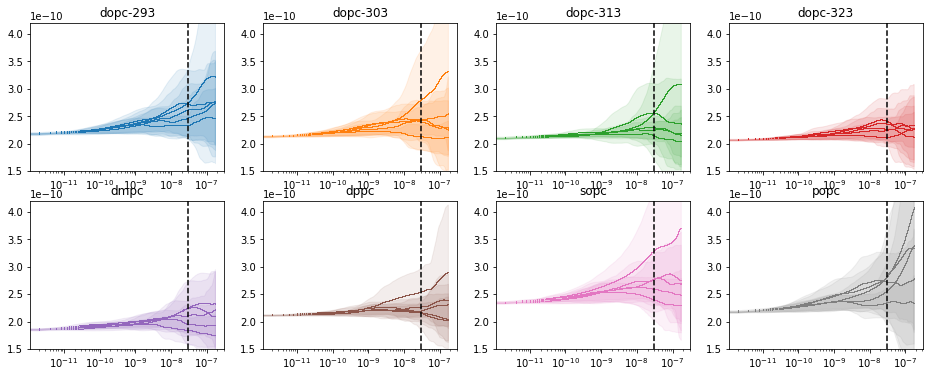

In [11]:
plt.figure(figsize = (16,6))
for l, lipid in enumerate(lipids):
    scolor = 'C'+str(l)
    plt.subplot(2,4,l+1)
    for r in range(5):
        vals = data[lipid+'-r'+str(r+1)+'-roll']
        errs = data[lipid+'-r'+str(r+1)+'-roll-unc']
        plt.plot(x,vals, ',', c=scolor)
        plt.fill_between(x, vals+errs, vals-errs, color=scolor, alpha=0.1)
    plt.title(lipid)
    plt.axvline(minerr, ls='--', c='black')
    plt.ylim(1.5e-10,4.2e-10)
    plt.xscale('log')
plt.show()

Once again, that's
$$s_{wtd} = \sqrt{\left(    \frac{\sum_{i=1}^n w_ix_i^2}{\sum_{i=1}^n w_i} - \left(    \bar x_{wtd}    \right)^2   \right)\frac{1}{n-1}}$$

In [12]:
averaged_viscs = pd.DataFrame()

for lipid in lipids:
    viscs = sp.array([data[lipid+'-r1-roll'], data[lipid+'-r2-roll'], data[lipid+'-r3-roll'],
                      data[lipid+'-r4-roll'], data[lipid+'-r5-roll']])
    weights = sp.array([data[lipid+'-r1-roll-unc'], data[lipid+'-r2-roll-unc'], data[lipid+'-r3-roll-unc'],
                      data[lipid+'-r4-roll-unc'], data[lipid+'-r5-roll-unc']])**(-2)
    averaged_viscs[lipid+'-visc'] = sp.average(viscs, weights=weights, axis=0)
    averaged_viscs[lipid+'-unc'] = (
        (
        sp.sum(weights*viscs**2, axis=0)/sp.sum(weights, axis=0)-averaged_viscs[lipid+'-visc']**2
        )/4
    )**(1/2)
averaged_viscs

,dopc-293-visc,dopc-293-unc,dopc-303-visc,dopc-303-unc,dopc-313-visc,dopc-313-unc,dopc-323-visc,dopc-323-unc,dmpc-visc,dmpc-unc,dppc-visc,dppc-unc,sopc-visc,sopc-unc,popc-visc,popc-unc
0,2.174330e-10,3.796010e-13,2.122877e-10,2.556133e-13,2.093780e-10,1.475081e-13,2.061776e-10,3.547140e-13,1.846408e-10,4.880294e-13,2.112208e-10,1.560373e-13,2.335420e-10,3.215680e-13,2.166389e-10,3.529380e-13
1,2.174330e-10,3.796010e-13,2.122877e-10,2.556133e-13,2.093780e-10,1.475081e-13,2.061776e-10,3.547140e-13,1.846408e-10,4.880294e-13,2.112208e-10,1.560373e-13,2.335420e-10,3.215680e-13,2.166389e-10,3.529380e-13
2,2.181192e-10,3.840558e-13,2.127919e-10,3.194270e-13,2.097434e-10,1.664752e-13,2.067398e-10,3.482388e-13,1.850154e-10,5.213863e-13,2.113165e-10,1.296116e-13,2.340108e-10,3.463098e-13,2.174883e-10,4.321188e-13
3,2.184485e-10,4.238588e-13,2.132338e-10,3.088059e-13,2.101614e-10,3.319658e-13,2.073600e-10,2.765932e-13,1.846998e-10,5.841075e-13,2.113785e-10,3.204753e-13,2.342310e-10,3.392290e-13,2.179147e-10,4.711706e-13
4,2.188771e-10,5.117342e-13,2.135252e-10,2.772272e-13,2.105824e-10,3.930724e-13,2.076114e-10,2.549225e-13,1.845972e-10,5.716520e-13,2.115037e-10,2.954216e-13,2.344866e-10,6.237189e-13,2.188434e-10,4.866166e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87995,2.643909e-10,9.550834e-12,2.224506e-10,1.007379e-11,2.159697e-10,8.325663e-12,2.239202e-10,3.008285e-12,1.953498e-10,1.038403e-11,2.200999e-10,9.669997e-12,2.492889e-10,1.164418e-11,2.524862e-10,1.770339e-11
87996,2.643909e-10,9.550899e-12,2.224502e-10,1.007372e-11,2.159698e-10,8.325661e-12,2.239202e-10,3.008310e-12,1.953498e-10,1.038403e-11,2.200998e-10,9.670006e-12,2.492895e-10,1.164421e-11,2.524860e-10,1.770346e-11
87997,2.643909e-10,9.550963e-12,2.224498e-10,1.007364e-11,2.159699e-10,8.325658e-12,2.239202e-10,3.008338e-12,1.953498e-10,1.038403e-11,2.200999e-10,9.670012e-12,2.492901e-10,1.164429e-11,2.524858e-10,1.770353e-11
87998,2.643910e-10,9.551033e-12,2.224493e-10,1.007354e-11,2.159700e-10,8.325662e-12,2.239203e-10,3.008359e-12,1.953498e-10,1.038403e-11,2.200999e-10,9.670016e-12,2.492907e-10,1.164441e-11,2.524856e-10,1.770360e-11


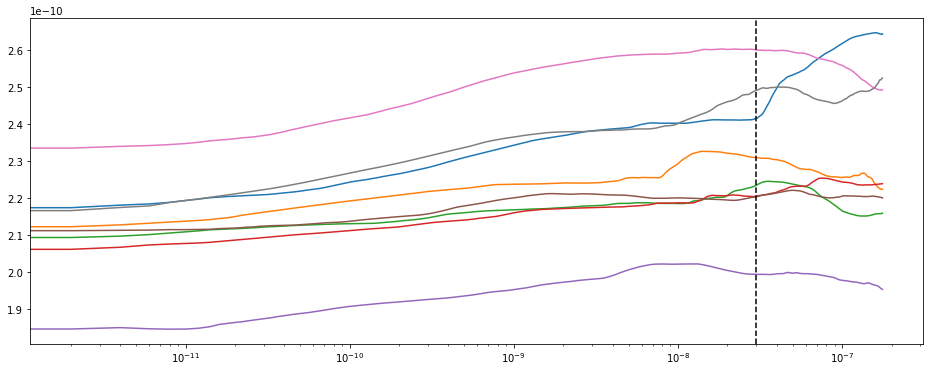

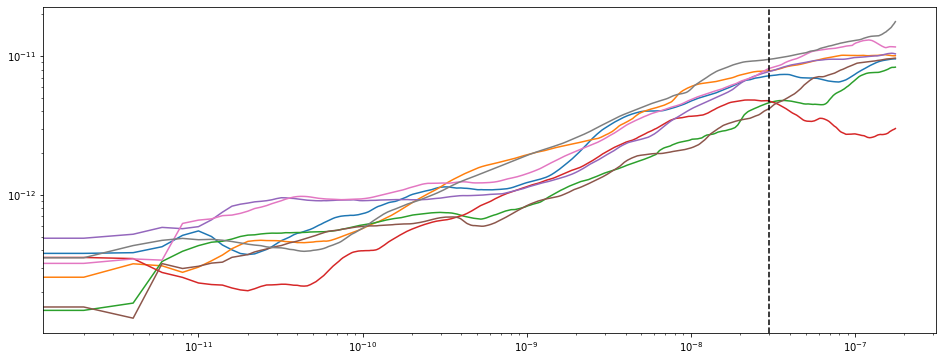

In [18]:
plt.figure(figsize = (16,6))
for l, lipid in enumerate(lipids):
    plt.plot(x, averaged_viscs[lipid+'-visc'])
# plt.xlim(1e-8,1e-7)
plt.xscale('log')
plt.axvline(minerr, ls='--', c='black')
plt.show()



plt.figure(figsize = (16,6))
for l, lipid in enumerate(lipids):
    plt.plot(x, averaged_viscs[lipid+'-unc'])
plt.xscale('log')
plt.axvline(minerr, ls='--', c='black')
plt.yscale('log')
plt.show()

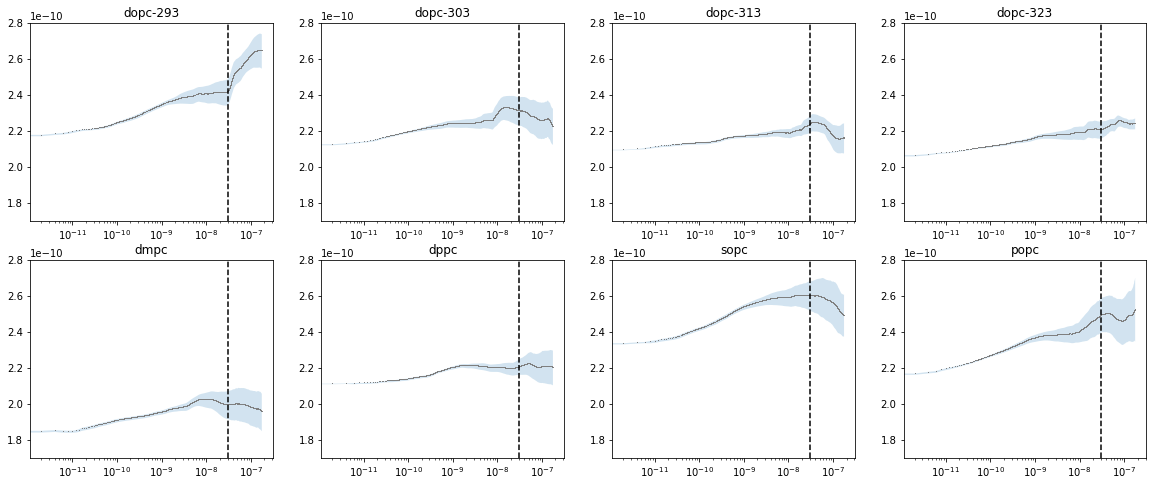

In [14]:
plt.figure(figsize = (20,8))
for l, lipid in enumerate(lipids):
    plt.subplot(2,4,l+1)
    vals = averaged_viscs[lipid+'-visc']
    errs = averaged_viscs[lipid+'-unc']
    plt.plot(x,vals, ',', c=scolor)
    plt.fill_between(x, vals+errs, vals-errs, alpha=0.2)
    plt.title(lipid)
    plt.ylim(1.7e-10,2.8e-10)
    plt.xscale('log')
    plt.axvline(minerr, ls='--', c='black')
plt.show()

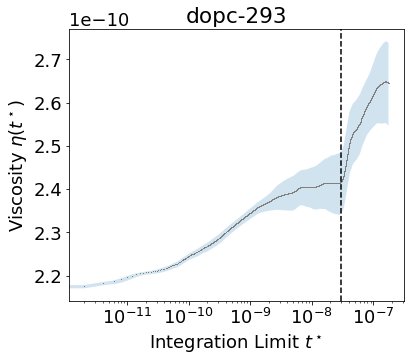

In [131]:
plt.figure(figsize = (6,5))
l=0
lipid='dopc-293'

vals = averaged_viscs[lipid+'-visc']
errs = averaged_viscs[lipid+'-unc']
plt.plot(x,vals, ',', c=scolor)
plt.fill_between(x, vals+errs, vals-errs, alpha=0.2)
plt.title(lipid)
# plt.ylim(1.7e-10,2.8e-10)
plt.xscale('log')
plt.xlabel('Integration Limit $t^\star$')
plt.ylabel('Viscosity $\eta(t^\star)$')
plt.axvline(minerr, ls='--', c='black')
plt.show()

In [15]:
mindex = int(minerr/2e-12)
mindex

14999

$$\eta\propto \frac{V}{T}\int{}$$

['dopc-293' 'dopc-303' 'dopc-313' 'dopc-323' 'dmpc' 'dppc' 'sopc' 'popc']


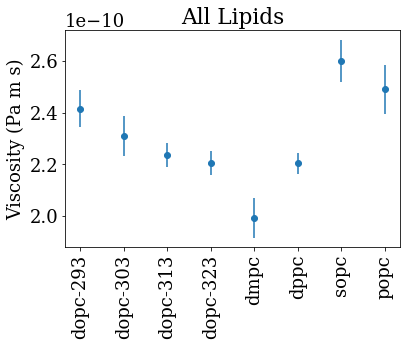

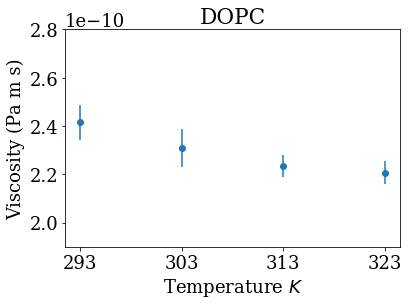

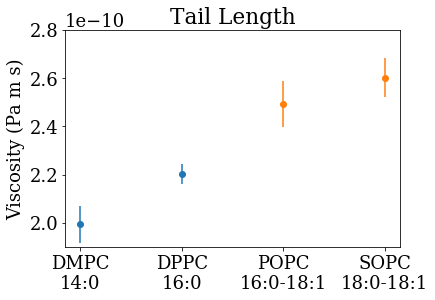

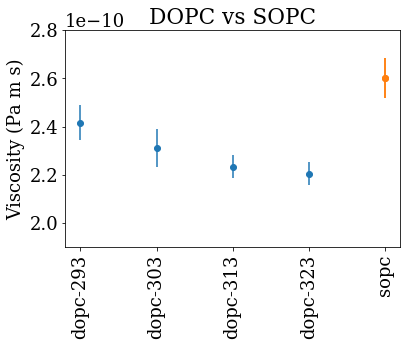

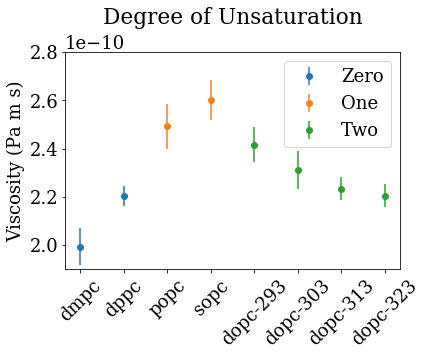

In [177]:
print(lipids)
yvals = sp.array([averaged_viscs[lipid+'-visc'][mindex] for lipid in lipids])
yerrs = sp.array([averaged_viscs[lipid+'-unc'][mindex] for lipid in lipids])
ylabel= 'Viscosity (Pa m s)'

top = 2.8e-10

##################################################

plt.errorbar(x=lipids,y=yvals,yerr=yerrs, ls='', marker='.', ms=12)
plt.xticks(rotation=90)
plt.ylabel(ylabel)
plt.title('All Lipids')
plt.show()

##################################################

templist = [293,303,313,323]
plt.errorbar(x=templist, y=yvals[:4], yerr=yerrs[:4], ls='', marker='.', ms=12)
plt.xticks(templist)
plt.title('DOPC')
plt.ylim(1.9e-10,top)
plt.xlabel('Temperature $K$')
# plt.xticks(rotation=45)
plt.ylabel(ylabel)
plt.show()

##################################################

plt.errorbar(x=['DMPC\n14:0', 'DPPC\n16:0'], y=[yvals[4],yvals[5]],
             yerr=[yerrs[4],yerrs[5]], ls='', marker='.', ms=12)
plt.title('Tail Length')
plt.ylim(1.9e-10,top)
plt.errorbar(x=['POPC\n16:0-18:1','SOPC\n18:0-18:1'], y=[yvals[7],yvals[6]],
             yerr=[yerrs[7],yerrs[6]], ls='', marker='.', ms=12)
plt.ylabel(ylabel)
plt.show()

##################################################

plt.errorbar(x=lipids[:4], y=yvals[:4], yerr=yerrs[:4], ls='', marker='.', ms=12)
plt.errorbar(x=[lipids[6],lipids[6]], y =[yvals[6],yvals[6]],
             yerr =[yerrs[6],yerrs[6]], ls='', marker='.', ms=12)
plt.title('DOPC vs SOPC')
plt.ylim(1.9e-10,top)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.show()

##################################################

zero_uns = [4,5]
one_uns = [7,6]
two_uns = [0,1,2,3]

plt.errorbar(x=lipids[zero_uns], y=yvals[zero_uns], yerr=yerrs[zero_uns], ls='', marker='.', ms=12)
plt.errorbar(x=lipids[one_uns], y=yvals[one_uns], yerr=yerrs[one_uns], ls='', marker='.', ms=12)
plt.errorbar(x=lipids[two_uns], y=yvals[two_uns], yerr=yerrs[two_uns], ls='', marker='.', ms=12)
plt.title('Degree of Unsaturation',pad=28)
plt.legend(['Zero','One','Two'])
plt.ylim(1.9e-10,top)
plt.xticks(rotation=45)
plt.ylabel(ylabel)
plt.show()



['dopc-293' 'dopc-303' 'dopc-313' 'dopc-323' 'dmpc' 'dppc' 'sopc' 'popc']


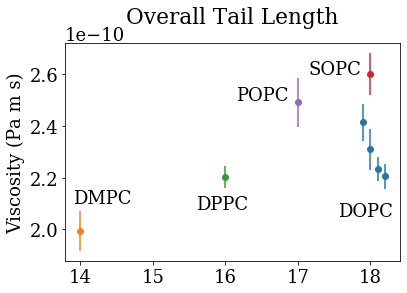

In [173]:
print(lipids)
fs = 18

tails = [17.9, 18, 18.1, 18.2, 14, 16, 18, 17]
plt.errorbar(x=tails[:4],y=yvals[:4],yerr=yerrs[:4], ls='', marker='.', ms=12)
plt.text(17.55,2.05e-10,'DOPC',fontsize=fs)

plt.errorbar(x=tails[4],y=yvals[4],yerr=yerrs[4], ls='', marker='.', ms=12)
plt.text(13.9,2.1e-10,'DMPC',fontsize=fs)

plt.errorbar(x=tails[5],y=yvals[5],yerr=yerrs[5], ls='', marker='.', ms=12)
plt.text(15.6,2.08e-10,'DPPC',fontsize=fs)

plt.errorbar(x=tails[6],y=yvals[6],yerr=yerrs[6], ls='', marker='.', ms=12)
plt.text(17.15,2.6e-10,'SOPC',fontsize=fs)

plt.errorbar(x=tails[7],y=yvals[7],yerr=yerrs[7], ls='', marker='.', ms=12)
plt.text(16.15,2.5e-10,'POPC',fontsize=fs)

plt.title("Overall Tail Length",pad=20)
plt.ylabel(ylabel)


plt.show()

In [17]:
print('this was the old thing')
# plt.errorbar(x = newarr[:,0,2], y = sp.average(newarr[:,:,0],axis=1,weights=newarr[:,:,1]**(-2)), 
#              yerr = sp.sum(newarr[:,:,1]**2,axis=1)**(1/2), 
# #              yerr = sp.stats.sem(newarr[:,:,0],axis=1),
#              ls='', marker='.', ms=12, label='Preliminary Results')
# # plt.plot(newarr[:,:,2], newarr[:,:,0],'s',ms=5)

# # plt.ylim(1.7e-10,3e-10)
# plt.errorbar(295,2.39e-10,yerr=1.25e-11, marker='.',ms=10, label='Final Result Expected Uncertainty')
# # plt.suptitle('DOPC viscosities',size=18,y=1.05)
# plt.title('DOPC viscosities',size=18)
# # plt.title('Results from 12% simulation length',size=15)
# plt.xlabel('Temperature (K)',size=16)
# plt.ylabel('Shear Viscosity ($Pa\cdot m\cdot s$)',size=16)
# plt.legend()
# plt.xticks(size=14)
# plt.yticks(size=14)

this was the old thing
